In [12]:
import json
from os import listdir
from os.path import join, isdir, exists
import re
from typing import Any, Dict
import math

import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
checkpoints_path = join("checkpoints")
experiment_path = join(checkpoints_path, "test_within")

In [11]:
with open(join(experiment_path, "line_args.json"), "r") as fp:
    line_args: Dict[str, Any] = json.load(fp)
print(line_args)

{'dataset_type': 'dreamer', 'dataset_path': './dreamer', 'windows_size': 1.0, 'discretize_labels': True, 'normalize_eegs': True, 'limit_train_batches': 1.0, 'checkpoints_path': '/content/drive/MyDrive/Colab Notebooks/eeg_emotion_recognition/checkpoints', 'seed': 42, 'batch_size': 1024, 'min_epochs': 1, 'max_epochs': 1000, 'validation': 'k_fold', 'k_folds': 10, 'setting': 'within_subject', 'precision': 32, 'benchmark': False, 'model': 'feegt', 'num_encoders': 1, 'window_embedding_dim': 128, 'auto_lr_finder': False, 'dropout_p': 0.25, 'noise_strength': 0.1, 'gradient_clipping': True, 'stochastic_weight_average': False, 'disable_masking': False, 'learning_rate': 0.0002, 'mels': 8, 'mel_window_size': 1.0, 'mel_window_stride': 0.1}


In [20]:
logs: pd.DataFrame = pd.DataFrame()
for subject in [f for f in listdir(experiment_path) if isdir(join(experiment_path,f))]:
    for fold in [f for f in listdir(join(experiment_path, subject)) if re.match(r"fold_[0-9]+", f)]:
        i_fold = int(fold.split("_")[-1])
        if not exists(join(experiment_path, subject, fold, "logs.csv")):
            continue
        logs_fold = pd.read_csv(join(experiment_path, subject, fold, "logs.csv"))
        logs_fold["subject"] = subject
        logs_fold["fold"] = i_fold
        logs = pd.concat([logs, logs_fold], ignore_index=True)
print(logs)

       Unnamed: 0  acc_mean_train  acc_arousal_train  loss_train  \
0               0        0.557079           0.585097    2.097614   
1               1        0.610333           0.625037    1.992820   
2               2        0.655042           0.667064    1.875777   
3               3        0.714555           0.702832    1.740232   
4               4        0.732439           0.717139    1.662972   
...           ...             ...                ...         ...   
12859          61        0.981625           0.985399    0.705612   
12860          62        0.982519           0.986293    0.687704   
12861          63        0.979043           0.985101    0.711593   
12862          64        0.981824           0.986591    0.692790   
12863          65        0.982916           0.986591    0.684769   

       acc_valence_train  acc_arousal_val  acc_dominance_train  \
0               0.526379         0.654155             0.559762   
1               0.544262         0.747989          

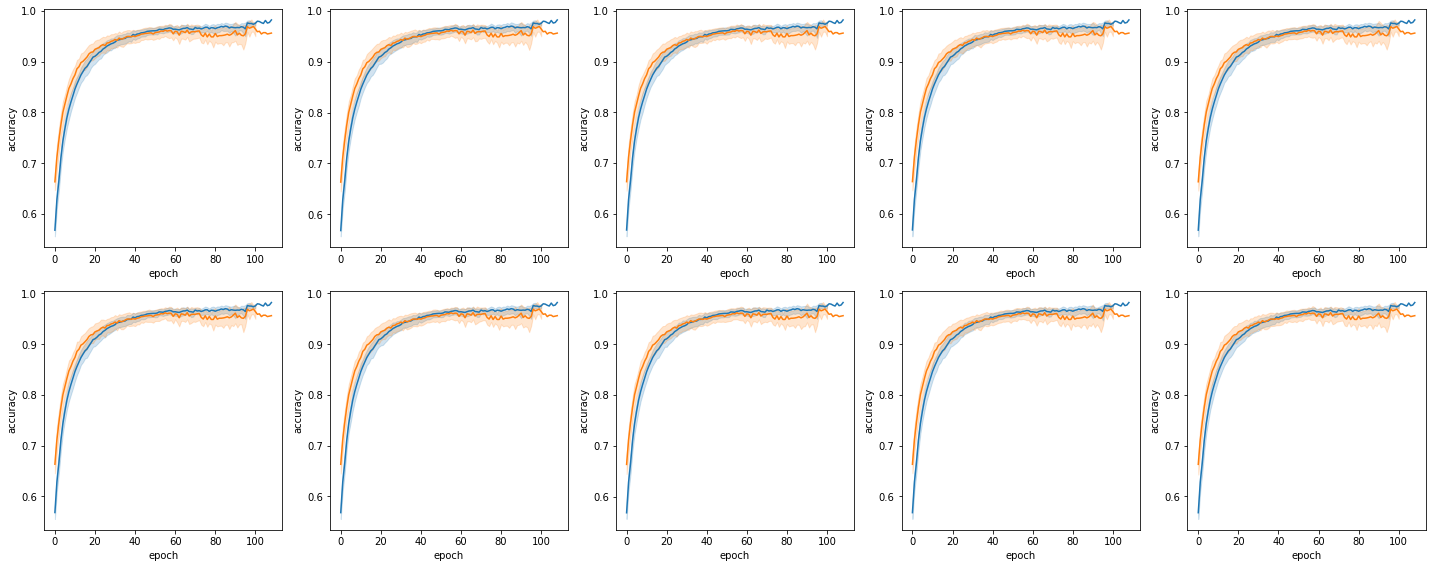

In [31]:
fig, axs = plt.subplots(nrows=2, ncols=line_args["k_folds"] // 2,
                        figsize=(10*2, 4*2),
                        tight_layout=True)
for i_fold, ax in enumerate(axs.flat):
    if i_fold >= line_args["k_folds"]:
        continue
    sns.lineplot(data=logs[logs["fold"] == 0], x="epoch", y="acc_mean_train",
                 ax=ax)
    sns.lineplot(data=logs[logs["fold"] == 0], x="epoch", y="acc_mean_val",
                 ax=ax)
    ax.set_xlabel("epoch")
    ax.set_ylabel("accuracy")
plt.show()